# Daten importieren

In [31]:
import pandas as pd

# Schritt 1: Lese die entsprechende Datei ein, speichere die Daten in der Variable 'df' ab und gib sie anschließend aus.
df = pd.read_csv("WG_Zimmer_Frankfurt.csv")
df

,room_length (m),room_width (m),kitchen_size,renovation,latitude,longitude,monthly_rent (Euro)
0,4.0,3.0,large,renovated,50.120599,8.688953,782.30
1,4.0,3.0,medium,renovated,50.116899,8.681512,619.35
2,6.0,3.0,large,not renovated,50.128794,8.690481,714.24
3,4.0,3.0,small,renovated,50.130921,8.688808,730.79
4,5.0,4.0,small,NaN,50.110269,8.679475,683.11
...,...,...,...,...,...,...,...
569,6.0,4.0,large,not renovated,50.116474,8.682178,834.75
570,6.0,3.0,small,renovated,50.128394,8.689024,816.87
571,4.0,NaN,NaN,not renovated,50.109805,8.688092,743.64
572,5.0,3.0,large,not renovated,50.110274,8.678473,816.77


In [32]:
# Schritt 2: Analysiere die Daten mithilfe von '.describe()'
df.describe()

,room_length (m),room_width (m),latitude,longitude,monthly_rent (Euro)
count,493.000000,522.000000,571.000000,572.000000,574.000000
mean,5.046653,3.572797,50.119633,8.684919,727.051969
std,0.828760,0.495147,0.008334,0.004459,74.171007
min,4.000000,3.000000,50.107695,8.675728,600.690000
25%,4.000000,3.000000,50.110600,8.680689,661.640000
50%,5.000000,4.000000,50.118866,8.685199,741.460000
75%,6.000000,4.000000,50.129198,8.689127,793.790000
max,6.000000,4.000000,50.134187,8.692352,849.180000


In [33]:
# Schritt 3: Führe diese Zelle aus, um für jede Spalte den Prozentsatz fehlender Werte anzuzeigen.
df.isnull().sum() / len(df)

room_length (m)        0.141115
room_width (m)         0.090592
kitchen_size           0.057491
renovation             0.095819
latitude               0.005226
longitude              0.003484
monthly_rent (Euro)    0.000000
dtype: float64

# Daten aufteilen

In [34]:
# Schritt 4: Weise die entsprechenden Features der Eingabevariable X und das zugehörige Ziel der Zielvariable y zu.
# Tipp: Verwende '.copy()' und '.pop()'.
X = df.copy()
y = X.pop("monthly_rent (Euro)")

In [35]:
X

,room_length (m),room_width (m),kitchen_size,renovation,latitude,longitude
0,4.0,3.0,large,renovated,50.120599,8.688953
1,4.0,3.0,medium,renovated,50.116899,8.681512
2,6.0,3.0,large,not renovated,50.128794,8.690481
3,4.0,3.0,small,renovated,50.130921,8.688808
4,5.0,4.0,small,NaN,50.110269,8.679475
...,...,...,...,...,...,...
569,6.0,4.0,large,not renovated,50.116474,8.682178
570,6.0,3.0,small,renovated,50.128394,8.689024
571,4.0,NaN,NaN,not renovated,50.109805,8.688092
572,5.0,3.0,large,not renovated,50.110274,8.678473


In [36]:
y

0      782.30
1      619.35
2      714.24
3      730.79
4      683.11
        ...  
569    834.75
570    816.87
571    743.64
572    816.77
573    790.37
Name: monthly_rent (Euro), Length: 574, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split

# Schritt 5: Unterteile die Daten in Trainings- und Testdaten, wobei die Testdaten 20% der Gesamtdaten ausmachen sollten.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
X_train

,room_length (m),room_width (m),kitchen_size,renovation,latitude,longitude
85,6.0,4.0,large,renovated,50.109613,8.682029
351,6.0,3.0,medium,renovated,50.130497,8.690376
122,6.0,4.0,large,not renovated,50.129218,8.679320
523,4.0,4.0,small,not renovated,50.120266,8.690239
118,4.0,4.0,large,not renovated,50.118897,8.690213
...,...,...,...,...,...,...
277,5.0,3.0,small,not renovated,50.126512,8.679742
9,NaN,NaN,NaN,not renovated,50.120011,8.682975
359,6.0,NaN,small,not renovated,50.110397,8.688671
192,6.0,4.0,medium,renovated,50.130948,8.690135


# Data Pipelines erstellen

### room_length und room_width

In [39]:
from sklearn.impute import SimpleImputer

# Schritt 6: Setze die 'strategy' von 'SimpleImputer' entsprechend, um die fehlenden Werte in den Spalten 'room_length (m)' und 'room_width (m)' zu ersetzen.
# Tipp: Du hast die Wahl zwischen "mean" und "most_frequent".
num_imputer_1 = SimpleImputer(strategy="mean")

In [40]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# Feature Engineering: Die Zimmerfläche lässt sich durch die Multiplikation von den Spalten 'room_length (m)' und 'room_width (m)' berechnen.
# Schritt 7: Führe diese Zelle aus, um den 'ColumnMultiplier' zu definieren, der es ermöglicht eine Zusätzliche Spalte mit den Zimmerflächen zu erzeugen.
class ColumnMultiplier(BaseEstimator, TransformerMixin):
    def __init__(self, column1_idx, column2_idx):
        self.column1_idx = column1_idx
        self.column2_idx = column2_idx

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = np.array(X)
        new_column = X[:, self.column1_idx] * X[:, self.column2_idx]
        X = np.column_stack((X, new_column))
        return X

In [41]:
# Schritt 8: Setze 'column1_idx' auf den Index der Spalte 'room_length (m)' und 'column2_idx' auf den Index der Spalte 'room_width (m)'.
column_multiplier = ColumnMultiplier(column1_idx=0, column2_idx=1)

In [42]:
from sklearn.pipeline import Pipeline

# Schritt 9: Vervollständige die Pipeline mithilfe der Instanzen, die du in Schritt 6 und Schritt 8 erstellt hast und führe diese Zelle aus, um die transformierten Features zu sehen.
room_dimensions_pipeline = Pipeline(steps=[
    ("imputer", num_imputer_1),
    ("multiplier", column_multiplier)
])

num_columns = ["room_length (m)", "room_width (m)"]
expanded_num_columns = ["room_length (m)", "room_width (m)", "room_area (m^2)"]

final_room_dimensions_train = pd.DataFrame(room_dimensions_pipeline.fit_transform(X_train[num_columns]), columns=expanded_num_columns, index=X_train.index)
final_room_dimensions_test = pd.DataFrame(room_dimensions_pipeline.transform(X_test[num_columns]), columns=expanded_num_columns, index=X_test.index)

final_room_dimensions_train

,room_length (m),room_width (m),room_area (m^2)
85,6.000000,4.000000,24.000000
351,6.000000,3.000000,18.000000
122,6.000000,4.000000,24.000000
523,4.000000,4.000000,16.000000
118,4.000000,4.000000,16.000000
...,...,...,...
277,5.000000,3.000000,15.000000
9,5.035443,3.563246,17.942521
359,6.000000,3.563246,21.379475
192,6.000000,4.000000,24.000000


In [43]:
X_train

,room_length (m),room_width (m),kitchen_size,renovation,latitude,longitude
85,6.0,4.0,large,renovated,50.109613,8.682029
351,6.0,3.0,medium,renovated,50.130497,8.690376
122,6.0,4.0,large,not renovated,50.129218,8.679320
523,4.0,4.0,small,not renovated,50.120266,8.690239
118,4.0,4.0,large,not renovated,50.118897,8.690213
...,...,...,...,...,...,...
277,5.0,3.0,small,not renovated,50.126512,8.679742
9,NaN,NaN,NaN,not renovated,50.120011,8.682975
359,6.0,NaN,small,not renovated,50.110397,8.688671
192,6.0,4.0,medium,renovated,50.130948,8.690135


### kitchen_size

In [ ]:
# Schritt 10: Setze die 'strategy' von 'SimpleImputer' entsprechend, um die fehlenden Einträge in der Spalte 'kitchen_size' zu ersetzen.
# Tipp: Du hast die Wahl zwischen "mean" und "most_frequent".
cat_imputer_1 = SimpleImputer(strategy="most_frequent")

In [44]:
from sklearn.preprocessing import OrdinalEncoder

# Schritt 11: Vervollständige die Liste 'custom_order', um die Rangfolge der Einträge in der Spalte 'kitchen_size' zu definieren.
custom_order = ["small", "medium", "large"]
ordinal_encoder = OrdinalEncoder(categories=[custom_order], handle_unknown="use_encoded_value", unknown_value=-1)

In [45]:
# Schritt 12: Vervollständige die Pipeline mithilfe der Instanzen, die du in Schritt 10 und Schritt 11 erstellt hast und führe diese Zelle aus, um das transformierte Feature zu sehen.
kitchen_size_pipeline = Pipeline(steps=[
    ("imputer", cat_imputer_1),
    ("encoder", ordinal_encoder)
])

final_kitchen_size_train = pd.DataFrame(kitchen_size_pipeline.fit_transform(X_train[["kitchen_size"]]), columns=["kitchen_size"], index=X_train.index)
final_kitchen_size_test = pd.DataFrame(kitchen_size_pipeline.transform(X_test[["kitchen_size"]]), columns=["kitchen_size"], index=X_test.index)

final_kitchen_size_train

,kitchen_size
85,2.0
351,1.0
122,2.0
523,0.0
118,2.0
...,...
277,0.0
9,2.0
359,0.0
192,1.0


In [46]:
X_train

,room_length (m),room_width (m),kitchen_size,renovation,latitude,longitude
85,6.0,4.0,large,renovated,50.109613,8.682029
351,6.0,3.0,medium,renovated,50.130497,8.690376
122,6.0,4.0,large,not renovated,50.129218,8.679320
523,4.0,4.0,small,not renovated,50.120266,8.690239
118,4.0,4.0,large,not renovated,50.118897,8.690213
...,...,...,...,...,...,...
277,5.0,3.0,small,not renovated,50.126512,8.679742
9,NaN,NaN,NaN,not renovated,50.120011,8.682975
359,6.0,NaN,small,not renovated,50.110397,8.688671
192,6.0,4.0,medium,renovated,50.130948,8.690135


### renovation

In [47]:
# Schritt 13: Setze die 'strategy' von 'SimpleImputer' entsprechend, um die fehlenden Einträge in der Spalte 'renovation' zu ersetzen.
# Tipp: Du hast die Wahl zwischen "mean" und "most_frequent".
cat_imputer_2 = SimpleImputer(strategy="most_frequent")

In [48]:
from sklearn.preprocessing import OneHotEncoder

# Schritt 14: Führe diese Zelle aus, um eine Instanz von einem 'OneHotEncoder' zu erstellen.
oh_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

In [49]:
# Schritt 15: Vervollständige die Pipeline mithilfe der Instanzen, die du in Schritt 13 und Schritt 14 erstellt hast und führe diese Zelle aus, um das transformierte Feature zu sehen.
renovation_pipeline = Pipeline(steps=[
    ("imputer", cat_imputer_2),
    ("encoder", oh_encoder)
])

oh_columns = ["not renovated", "renovated"]

final_renovation_train = pd.DataFrame(renovation_pipeline.fit_transform(X_train[["renovation"]]), columns=oh_columns, index=X_train.index)
final_renovation_test = pd.DataFrame(renovation_pipeline.transform(X_test[["renovation"]]), columns=oh_columns, index=X_test.index)

final_renovation_train

,not renovated,renovated
85,0.0,1.0
351,0.0,1.0
122,1.0,0.0
523,1.0,0.0
118,1.0,0.0
...,...,...
277,1.0,0.0
9,1.0,0.0
359,1.0,0.0
192,0.0,1.0


# latitude und longitude

<Axes: xlabel='latitude', ylabel='longitude'>

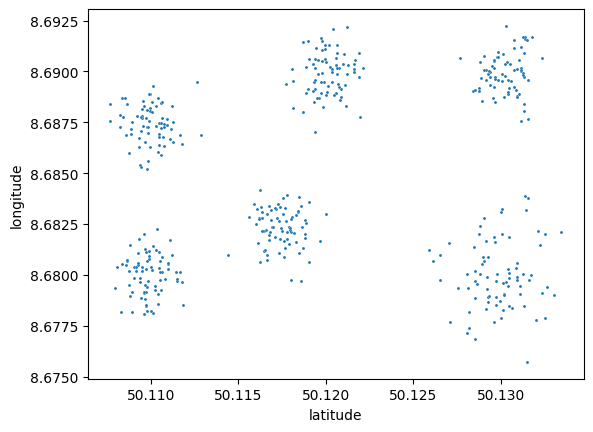

In [51]:
import seaborn as sns

# Schritt 16: Führe diese Zelle aus, um die Koordinaten zu visualisieren und die Anzahl der Cluster zu bestimmen, die du später für K-Means benötigen wirst.
sns.scatterplot(x=X_train["latitude"], y=X_train["longitude"], s=5)

In [52]:
# Schritt 17: Setze die 'strategy' von 'SimpleImputer' entsprechend, um die fehlenden Werte in den Spalten 'latitude' und 'longitude' zu ersetzen.
# Tipp: Du hast die Wahl zwischen "mean" und "most_frequent".
num_imputer_2 = SimpleImputer(strategy="mean")

In [53]:
from sklearn.preprocessing import StandardScaler

# Schritt 18: Erstelle eine Instanz von 'StandardScaler', um die Daten vor dem K-Means-Clustering zu skalieren.
standard_scaler = StandardScaler()

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

class ClusterCreator(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=0)

    def fit(self, X, y=None):
        self.kmeans.fit(X)
        return self

    def transform(self, X):
        clusters = self.kmeans.predict(X)
        return clusters.reshape(-1, 1)

# Schritt 19: Nutze deine beobachtung aus Schritt 16, um 'n_clusters' entsprechend zu setzen.
cluster_creator = ClusterCreator(n_clusters=6)

In [55]:
# Schritt 20: Vervollständige die Pipeline mit den Instanzen, die du in Schritt 17, Schritt 18 und Schritt 19 erstellt hast, und führe diese Zelle aus, um die Cluster auszugeben.
coordinates_pipeline = Pipeline(steps=[
    ("imputer", num_imputer_2),
    ("scaler", standard_scaler),
    ("clusterer", cluster_creator)
])

coordinates_columns = ["latitude", "longitude"]

clustered_train_coordinates = pd.DataFrame(coordinates_pipeline.fit_transform(X_train[coordinates_columns]), columns=["Cluster"], index=X_train.index)
clustered_test_coordinates = pd.DataFrame(coordinates_pipeline.transform(X_test[coordinates_columns]), columns=["Cluster"], index=X_test.index)

clustered_train_coordinates

,Cluster
85,5
351,1
122,2
523,4
118,4
...,...
277,2
9,3
359,0
192,1


<Axes: xlabel='latitude', ylabel='longitude'>

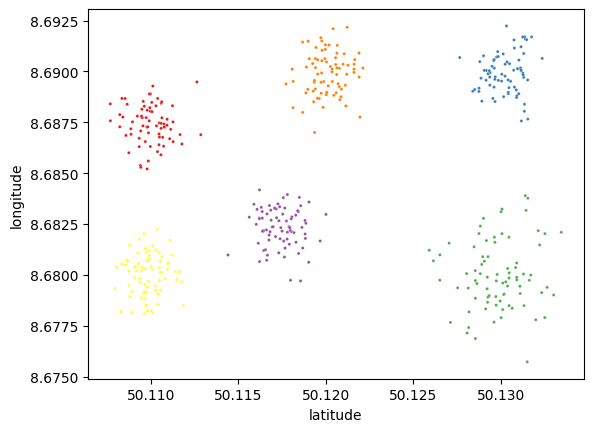

In [58]:
# Schritt 21: Führe diese Zelle aus, um die erstellten Cluster zu visualisieren.
sns.scatterplot(x=X_train["latitude"], y=X_train["longitude"], hue=clustered_train_coordinates["Cluster"], palette="Set1", s=5, legend=False)

# ColumnTransformer - Alle Preprocessing Schritte zusammmenführen

In [59]:
from sklearn.compose import ColumnTransformer

# Schritt 22: Vervollständige den 'ColumnTransformer' mithilfe der Pipelines, die du in Schritt 9, Schritt 12, Schritt 15 und Schritt 20 erstellt hast und führe diese Zelle aus, um die transformierten Features zu sehen.
preprocessor = ColumnTransformer(
    transformers=[
        ("room_dimensions_columns", room_dimensions_pipeline, ["room_length (m)", "room_width (m)"]),
        ("kitchen_size_column", kitchen_size_pipeline, ["kitchen_size"]),
        ("renovation_column", renovation_pipeline, ["renovation"]),
        ("coordinates_colums", coordinates_pipeline, ["latitude", "longitude"])
    ])

final_columns = ["room_length (m)", "room_width (m)", "room_area (m^2)", "kitchen_size", "not renovated", "renovated", "Cluster"]

X_train_final = pd.DataFrame(preprocessor.fit_transform(X_train), columns=final_columns, index=X_train.index)
X_test_final = pd.DataFrame(preprocessor.transform(X_test), columns=final_columns, index=X_test.index)

X_train_final

,room_length (m),room_width (m),room_area (m^2),kitchen_size,not renovated,renovated,Cluster
85,6.000000,4.000000,24.000000,2.0,0.0,1.0,5.0
351,6.000000,3.000000,18.000000,1.0,0.0,1.0,1.0
122,6.000000,4.000000,24.000000,2.0,1.0,0.0,2.0
523,4.000000,4.000000,16.000000,0.0,1.0,0.0,4.0
118,4.000000,4.000000,16.000000,2.0,1.0,0.0,4.0
...,...,...,...,...,...,...,...
277,5.000000,3.000000,15.000000,0.0,1.0,0.0,2.0
9,5.035443,3.563246,17.942521,2.0,1.0,0.0,3.0
359,6.000000,3.563246,21.379475,0.0,1.0,0.0,0.0
192,6.000000,4.000000,24.000000,1.0,0.0,1.0,1.0


# Modell definieren und finale Pipeline erstellen

In [60]:
from sklearn.ensemble import RandomForestRegressor

# Schritt 23: Erstelle eine Instanz von 'RandomForestRegressor' und vervollständige die finale Pipeline.
model = RandomForestRegressor(random_state=0)

final_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

# Hyperparameteroptimierung


In [61]:
from sklearn.model_selection import GridSearchCV

# Schritt 24: Erstelle jeweils eine Liste mit verschiedenen Werten für 'n_estimators' und 'max_depth'.
param_grid = {
    "model__n_estimators": [100, 150, 200],
    "model__max_depth": [9, 10, 11]
}

# Schritt 25: Setze bei GridSearchCV die Anzahl an Folds auf 4 und scoring auf "neg_mean_absolute_error".
grid_search = GridSearchCV(final_pipeline, param_grid, cv=4, scoring="neg_mean_absolute_error")
grid_search.fit(X_train, y_train)

print("Best Mean Absolute Error: ", -grid_search.best_score_)
print("Best Parameters: ", grid_search.best_params_)

Best Mean Absolute Error:  57.53342408040814
Best Parameters:  {'model__max_depth': 10, 'model__n_estimators': 150}


# Beste Pipeline und finalen Mean Absolute Error



In [62]:
from sklearn.metrics import mean_absolute_error

# Schritt 26: Speichere die beste Pipeline in 'best_pipeline' ab mithilfe von '.best_estimator_' und berechne den finalen MAE auf den Testdaten.
best_pipeline = grid_search.best_estimator_
y_predict = best_pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_predict)

print("Final MAE:", mae)

Final MAE: 59.239941796704535
